In [1]:
import sys
import numpy as np
import scipy.integrate as sint
import matplotlib.pyplot as plt
from typing import (Union, List, Tuple)

In [2]:
# Add module pathe to python search path 
sys.path.append("/Users/manu/Projects/LiSA_FFC/")
# Import lisa
from lisa import lisa_3d as nma

In [3]:
# specify angular grids and
# angular distribution parameters
vzmin, vzmax = -1, 1
phmin, phmax = -np.pi, np.pi
nvz, nph = 32, 8
dvz, dph = (vzmax - vzmin) / nvz, (phmax - phmin) / nph
vzs = vzmin + (0.5 + np.arange(nvz)) * dvz
phs = phmin + (0.5 + np.arange(nph)) * dph
phasespace_fac = 1.0 / (2.0 * np.pi)
fluxangle = 30 * np.pi / 180.0

We here use to the fiducial angular distribution used in arXiv: 

In [4]:
# Angular distribution
def f(vz, ph=0, sig=0.6):
    return np.exp(-(vz-1)**2/(2*sig**2)) 

In [5]:
N = sint.dblquad(f, phmin, phmax, vzmin, vzmax, args=(0.6,))[0] * phasespace_fac
bN = sint.dblquad(f, phmin, phmax, vzmin, vzmax, args=(0.5,))[0] * phasespace_fac

print(f"{N=:1.16E}\n{bN=:1.16E}")

N=7.5134318553167179E-01
bN=6.2661737464261436E-01


In [6]:
# ELN
def ELN(vz: Union[float, np.ndarray[float]], phi: Union[float, np.ndarray[float]],
        signu: float = 0.6, siganu: float = 0.5, alpha: float = 0.9,
        N: float = 0.7513431855316718, bN: float = 0.6266173746426144,
        fluxangle=fluxangle) -> Union[float, np.ndarray[float]]:

    vx = np.sqrt(1.0 - vz**2) * np.cos(phi)
    vy = np.sqrt(1.0 - vz**2) * np.sin(phi)

    cr= np.cos(fluxangle)
    sr = np.sin(fluxangle)

    vzr_n = vz
    vzr_an = -sr * vx + cr * vz

    return f(vz=vzr_n, sig=signu)/N - alpha * f(vz=vzr_an, sig=siganu) / bN

ELN plot saved to ELN_lsa_30.png
Max I0: 7.2827E-01
Max Ix: 5.3249E-01
Max Iy: 3.4697E-01
Max Iz: 4.5362E-01
e0: 1.0000E-01
ex: 2.7052E-01
ey: 0.0000E+00
ez: 5.4148E-02

[=     ] 0% [ikz=0 iky=0 ikx=70]

KeyboardInterrupt: 

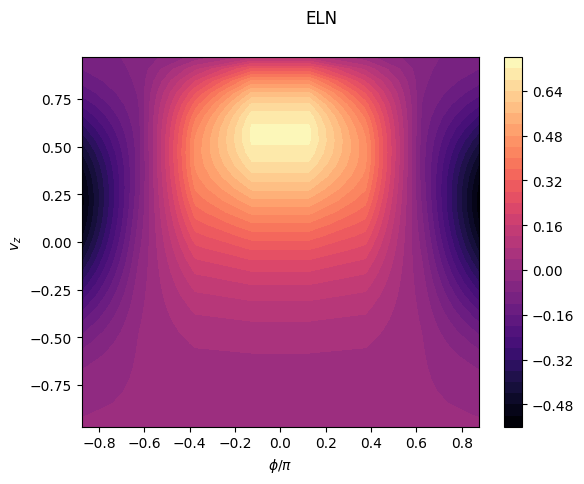

In [7]:
eln_params = {
    'ELN': ELN,
    'vz_range': (vzmin, vzmax),
    'phi_range': (phmin, phmax),
    'nvz': nvz,
    'nphi': nph,
}

kxs = np.fft.fftshift(np.fft.fftfreq(n=100, d=1.0))
kys = np.fft.fftshift(np.fft.fftfreq(n=100, d=1.0))
kzs = np.fft.fftshift(np.fft.fftfreq(n=100, d=1.0))

lsa = nma.NMA_3D(ELN_params=eln_params)

store_to = f"lsa_{fluxangle*(180/np.pi):.0f}.dat"

lsa.run(
    kxs=kxs,
    kys=kys,
    kzs=kzs,
    store_to=store_to,
)

print(f"Results stored at {store_to}")
